In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/content/data.csv'
with open(path) as f:
  data = np.loadtxt(f ,delimiter = ",")

In [3]:
np.random.shuffle(data)
n, m = data.shape

ratio = 0.9

training = data[: int(ratio * n)]
testing = data[int(ratio * n) :]

In [4]:
# Baseline
def Baseline_Movie(training, movie_id):
  movie_id_sample = training[training[:,1] == movie_id]
  number = movie_id_sample.shape[0]
  if number == 0:
    return 3
  else:
    summation = np.sum(movie_id_sample, axis = 0)[2]
    return summation / number

In [5]:
# Heursitic manner
row_num = len(set(data[:,0]))
col_num = len(set(data[:,1]))

def create_Xmat(X, row_num, col_num, data):
  for info in data:
    X[int(info[0]) - 1, int(info[1]) - 1] = info[2]
  return X

def Heuristic_Movie(row_num, col_num, training, r, iter = 200):
  # initialize
  X = np.zeros((row_num, col_num))
  error_record = np.zeros(iter)
  
  for num in range(iter):
    X = create_Xmat(X, row_num, col_num, training)
    U, S, VT = np.linalg.svd(X)
    S_new = np.zeros((row_num, col_num))
    for i in range(r):
      S_new[i,i] = S[i]
    
    X_new = U @ S_new @ VT
    error = np.linalg.norm(X - X_new, ord='fro')
    error_record[num] = error
    X = X_new
  
  return X, error_record

In [6]:
# SE function
def SE(X, testing):
  se = 0
  for data_sample in testing:
    row = int(data_sample[0] - 1)
    col = int(data_sample[1] - 1)
    predict = X[row, col]
    se += (predict - data_sample[2])**2
  
  return se

In [ ]:
# Main function

# Construct Baseline X_baseline
tmp = np.zeros(col_num)
for i in range(col_num):
  tmp[i] = Baseline_Movie(training, i+1)

X_baseline = np.tile(tmp, (row_num, 1))

se_baseline = SE(X_baseline, testing)

# Heuristic manner
R = np.arange(1, 21)
num_R = R.shape[0]
se_heuristic = np.zeros(num_R)
iter = 200
err_heuristic = np.zeros((num_R, iter))
for idx in range(num_R):
  r = R[idx]
  [X_heuristic, error_record] = Heuristic_Movie(row_num, col_num, training, r, iter)
  # {1, ..., 20} * {0, ..., 199} iteration F-norm error to check the convergence
  err_heuristic[idx, :] = error_record

  X_heuristic[X_heuristic <= 1] = 1
  X_heuristic[X_heuristic >= 5] = 5
  # {1, 2, ..., 20} SE on testing set
  se_heuristic[idx] = SE(X_heuristic, testing)

Text(0.5, 1.0, 'Error over Iterations when r = 5')

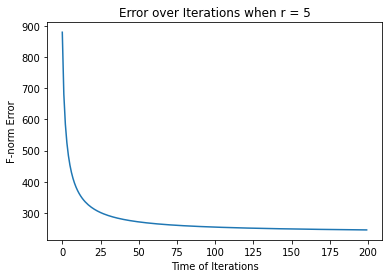

In [ ]:
# visualization
# plot the iteration error when r = 5 to check the convergence
plt.plot(err_heuristic[4,:])
plt.xlabel('Time of Iterations')
plt.ylabel('F-norm Error')
plt.title('Error over Iterations when r = 5')

Text(0.5, 1.0, 'Square Error with different choice of rank r')

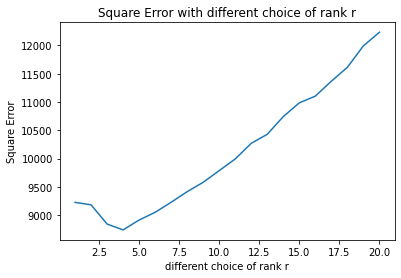

In [ ]:
# visualization
# plot the testing SE curve
plt.plot(R, se_heuristic)
plt.xlabel('different choice of rank r')
plt.ylabel('Square Error')
plt.title('Square Error with different choice of rank r')


In [8]:

# Construct Baseline X_baseline
tmp = np.zeros(col_num)
for i in range(col_num):
  tmp[i] = Baseline_Movie(training, i+1)

X_baseline = np.tile(tmp, (row_num, 1))

se_baseline = SE(X_baseline, testing)
se_baseline

10454.814868636262